In [258]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

cerveja_df = pd.read_csv("Consumo_cerveja.csv", sep=';')
cerveja_df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


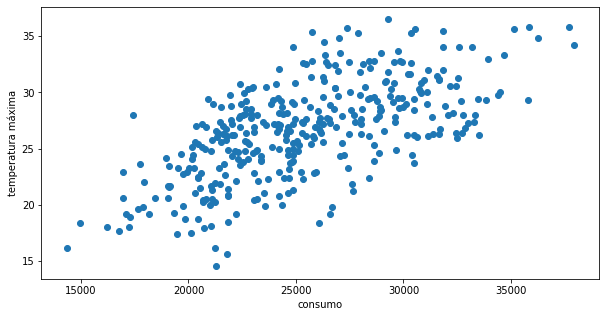

In [259]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.scatter(cerveja_df['consumo'], cerveja_df['temp_max'])
plt.xlabel('consumo')
plt.ylabel('temperatura máxima')

plt.show()

In [260]:
sample = cerveja_df.sample(365)[['consumo', 'temp_max']]

Função de predição

In [261]:
def prediction(t0, t1, x):
    
    hx = t0 * 1 + t1 * x
    
    return hx

Função de custo

In [262]:
def cost(y, p):
    
    cost = 0
    
    for val in zip(y, p):
        cost += (val[0] - val[1]) ** 2
        
    cost = cost / (2 * (len(y)))
    
    return cost

Normalização do vetor (cada valor - menor valor / 100)

In [263]:
def normalize(vector):
    
    menor = np.min(vector)
    
    norm = [(val - menor) / 1000 for val in vector]
    
    return norm

In [264]:
theta_0 = 10
theta_1 = 0

use_sample = True

In [265]:
src = cerveja_df

if use_sample:
    src = sample

ncons = normalize(src['consumo'])
src

,consumo,temp_max
61,24146,29.5
120,17939,22.0
242,28441,32.2
70,22409,26.9
303,35781,29.3
...,...,...
331,34382,29.8
201,21825,21.4
288,27387,35.7
275,24876,25.0


In [266]:

preds = [prediction(theta_0, theta_1, temp) for temp in cerveja_df['temp_max']]

for res in zip(preds, ncons):
    print(res)

(10.0, 9.803)
(10.0, 3.596)
(10.0, 14.098)
(10.0, 8.066)
(10.0, 21.438)
(10.0, 15.236)
(10.0, 12.687)
(10.0, 16.796)
(10.0, 18.124)
(10.0, 10.89)
(10.0, 7.961)
(10.0, 10.942)
(10.0, 6.469)
(10.0, 8.645)
(10.0, 7.049)
(10.0, 10.974)
(10.0, 10.34)
(10.0, 8.179)
(10.0, 11.136)
(10.0, 12.348)
(10.0, 19.479)
(10.0, 6.902)
(10.0, 18.193)
(10.0, 7.136)
(10.0, 15.294)
(10.0, 12.493)
(10.0, 7.484)
(10.0, 14.113)
(10.0, 12.125)
(10.0, 12.046)
(10.0, 13.528)
(10.0, 16.967)
(10.0, 15.043)
(10.0, 17.841)
(10.0, 15.629)
(10.0, 10.336)
(10.0, 9.032)
(10.0, 10.727)
(10.0, 5.884)
(10.0, 14.062)
(10.0, 18.37)
(10.0, 12.803)
(10.0, 5.607)
(10.0, 16.482)
(10.0, 9.84)
(10.0, 15.226)
(10.0, 16.162)
(10.0, 18.529)
(10.0, 13.175)
(10.0, 8.046)
(10.0, 13.37)
(10.0, 21.911)
(10.0, 14.845)
(10.0, 11.752)
(10.0, 18.108)
(10.0, 8.441)
(10.0, 6.938)
(10.0, 7.856)
(10.0, 13.145)
(10.0, 9.879)
(10.0, 14.636)
(10.0, 10.519)
(10.0, 15.417)
(10.0, 6.337)
(10.0, 15.583)
(10.0, 13.646)
(10.0, 4.77)
(10.0, 9.223)
(10.0, 4.

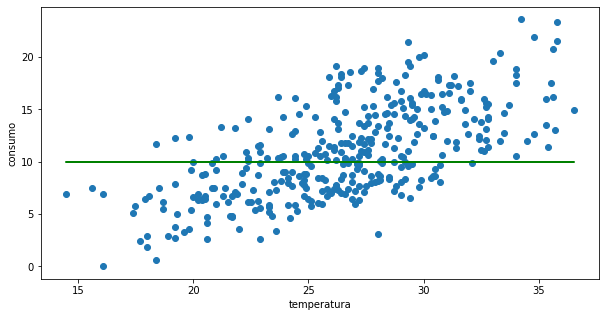

In [267]:
plt.scatter(src['temp_max'], ncons)
plt.xlabel('temperatura')
plt.ylabel('consumo')
plt.plot([a for a in src['temp_max']], preds, 'g')  # Linha de predição
plt.show()

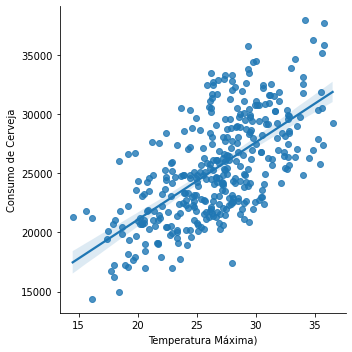

In [268]:
ax = sns.lmplot(x = "temp_max", y = "consumo", data = cerveja_df)
ax.set_xlabels("Temperatura Máxima)")
ax.set_ylabels("Consumo de Cerveja")
ax